# Decision Trees in Python
By Anshumaan Mishra 24CS10082

### 1. Imports

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

### 2. Data Reading and checking for nulls

In [59]:
breastCancerData = pd.read_csv("./data/kodeinData.csv", header=0)
#Renaming columns to remove spaces for easier direct accessing
breastCancerData.columns = ['Age', 'Race', 'Marital Status', 'TStage', 'NStage', '6thStage',
       'differentiate', 'Grade', 'AStage', 'TumorSize', 'EstrogenStatus',
       'ProgesteroneStatus', 'RegionalNodeExamined',
       'ReginolNodePositive', 'SurvivalMonths', 'Status']
(breastCancerData.columns, breastCancerData.dtypes)

(Index(['Age', 'Race', 'Marital Status', 'TStage', 'NStage', '6thStage',
        'differentiate', 'Grade', 'AStage', 'TumorSize', 'EstrogenStatus',
        'ProgesteroneStatus', 'RegionalNodeExamined', 'ReginolNodePositive',
        'SurvivalMonths', 'Status'],
       dtype='object'),
 Age                      int64
 Race                    object
 Marital Status          object
 TStage                  object
 NStage                  object
 6thStage                object
 differentiate           object
 Grade                   object
 AStage                  object
 TumorSize                int64
 EstrogenStatus          object
 ProgesteroneStatus      object
 RegionalNodeExamined     int64
 ReginolNodePositive      int64
 SurvivalMonths           int64
 Status                  object
 dtype: object)

In [60]:
breastCancerData.head()

,Age,Race,Marital Status,TStage,NStage,6thStage,differentiate,Grade,AStage,TumorSize,EstrogenStatus,ProgesteroneStatus,RegionalNodeExamined,ReginolNodePositive,SurvivalMonths,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [61]:
#Checking for Nulls:
hasna = []
null = []
for i in breastCancerData.columns:
    hasna.append(int(breastCancerData[i].hasnans))
    if(breastCancerData[i].hasnans): null.append(i)

print(sum(hasna)) # gives number of columns with null values
print(null)

print()

# Extracting unique values of all columns
for i in breastCancerData.columns:
    print(breastCancerData[i].unique())


0
[]

[68 50 58 47 51 40 69 46 65 48 62 61 56 43 60 57 55 63 66 53 59 54 49 64
 42 37 67 31 52 33 45 38 39 36 41 44 32 34 35 30]
['White' 'Black' 'Other']
['Married' 'Divorced' 'Single ' 'Widowed' 'Separated']
['T1' 'T2' 'T3' 'T4']
['N1' 'N2' 'N3']
['IIA' 'IIIA' 'IIIC' 'IIB' 'IIIB']
['Poorly differentiated' 'Moderately differentiated' 'Well differentiated'
 'Undifferentiated']
['3' '2' '1' ' anaplastic; Grade IV']
['Regional' 'Distant']
[  4  35  63  18  41  20   8  30 103  32  13  59  15  19  46  24  25  29
  40  70  22  50  17  21  10  27  23   5  51   9  55 120  77   2  11  12
  26  75 130  34  80   3  60  14  16  45  36  76  38  49   7  72 100  43
  62  37  68  52  85  57  39  28  48 110  65   6 105 140  42  31  90 108
  98  47  54  61  74  33   1  87  81  58 117  44 123 133  95 107  92  69
  56  82  66  78  97  88  53  83 101  84 115  73 125 104  94  86  64  96
  79  67]
['Positive' 'Negative']
['Positive' 'Negative']
[24 14  2  3 18 11  9 20 21 13 23 16  1 22 15  4 26 31 25 10  5

#### Classification of Columns
We observe that the columns can be classifies as follows:
1. float columns: 'Age', 'TumorSize', 'RegionalNodeExamined',
       'ReginolNodePositive' and 'SurvivalMonths'
2. Category Columns: 'Race', 'Marital Status', 'TStage', 'NStage', '6thStage',
       'differentiate', 'Grade', 'AStage', 'EstrogenStatus',
       and 'ProgesteroneStatus'
3. Since 'AStage', 'EstrogenStatus', 'ProgesteroneStatus' and 'Status' have only two values, it is to be modified separately, to give binary output
This is based on the definitions of the data present in the columns, as the data in the columns classified as "Category Columns" is Fixed out of several options.

Since sklearn decision trees take float columns to be grouped data, category columns need to be separated to avoid grouping them together, citing 'similarity' on any basis.

In [62]:
#Separation of X and Y data. Y axis holds Alive/Dead. Hence
X = breastCancerData.drop('Status', axis = 1).copy()
Y = breastCancerData.Status.copy()
# globalRandomState = 1 # to change random_state

# Splitting Columns: 
categoryAdjustedX = pd.get_dummies(X, columns=['Race', 'Marital Status', 'TStage','NStage', '6thStage', 'differentiate', 'Grade'])


# Reformatting Columns:
tempAstage = categoryAdjustedX.AStage.copy()
tempEstrogenStatus = categoryAdjustedX.EstrogenStatus.copy()
tempProgesteroneStatus = categoryAdjustedX.ProgesteroneStatus.copy()

tempAstage[tempAstage == "Regional"] = 1
tempAstage[tempAstage == "Distant"] = 0
categoryAdjustedX.AStage = tempAstage.astype(bool)

tempEstrogenStatus[tempEstrogenStatus == "Positive"] = 1
tempEstrogenStatus[tempEstrogenStatus == "Negative"] = 0
categoryAdjustedX.EstrogenStatus = tempEstrogenStatus.astype(bool)

tempProgesteroneStatus[tempProgesteroneStatus == "Positive"] = 1
tempProgesteroneStatus[tempProgesteroneStatus == "Negative"] = 0
categoryAdjustedX.ProgesteroneStatus = tempProgesteroneStatus.astype(bool)

# Here, no scaling is required because the tree is not sensitive to the variance in data.

# Reformatting Y
categoryAdjustedY = Y.copy()
categoryAdjustedY[categoryAdjustedY == "Alive"] = 1
categoryAdjustedY[categoryAdjustedY == "Dead"] = 0
categoryAdjustedY = categoryAdjustedY.astype(bool)

### 3. Decision Tree Creation
Now that we have the data organised as we want, we can make the decision tree

In [63]:
#We use the 'train_test_split' function to split the data between testing data and training data
def getSplit(categoryAdjustedX, categoryAdjustedY):
    # Random state chosen at random.
    trainingX, testingX, trainingY, testingY = train_test_split(categoryAdjustedX, categoryAdjustedY)
    return [trainingX, testingX, trainingY, testingY]

#### Pruning the decision tree

In [64]:
def scoreModel(treeList, trainingX, trainingY, testingX, testingY):
    trainingSetScore = [tempTree.score(trainingX, trainingY) for tempTree in treeList]
    testingSetScore = [tempTree.score(testingX, testingY) for tempTree in treeList]
    return [trainingSetScore, testingSetScore]

In [65]:
def createAndPrune(globalCriterion, trainingX, trainingY):
    # Creation of a temporaty tree without any value of alpha:
    classificationTree = DecisionTreeClassifier(criterion=globalCriterion)
    classificationTree = classificationTree.fit(trainingX, trainingY)

    # Determination of an optimal alpha through cost_complexity_pruning
    currentPruningPath = classificationTree.cost_complexity_pruning_path(trainingX, trainingY)
    alphaList = currentPruningPath.ccp_alphas[:-1]
    treeList = []
    for alpha in alphaList:
        classificationTree = DecisionTreeClassifier(criterion=globalCriterion, ccp_alpha=alpha)
        classificationTree.fit(trainingX, trainingY)
        treeList.append(classificationTree)

    return [treeList, alphaList]

In [66]:
#Scoring and Benchmarking
def scorePlot(alphaList, trainingSetScore, testingSetScore):
    figure, axes = plt.subplots()
    axes.set_xlabel("alpha")
    axes.set_ylabel("accuracy")
    axes.plot(alphaList, trainingSetScore, label="trainSet", drawstyle='steps-post')
    axes.plot(alphaList, testingSetScore, label="testSet", drawstyle='steps-post')
    axes.legend()
    plt.show()

In [67]:
def getBestAccuracy(testingSetScore, trainingSetScore):
    # The best suited value of alpha, here, lies at the point of least distance from the two plots, as observed from the graph#

    # Finding alpha with leas accuracy difference
    bestAccuracy = abs(testingSetScore[0] - trainingSetScore[0])
    index = 0
    for i in range(0, len(trainingSetScore)):
        if(bestAccuracy > (abs(testingSetScore[i] - trainingSetScore[i]))):
            bestAccuracy = abs(testingSetScore[i] - trainingSetScore[i])
            index = i
        elif(bestAccuracy > (abs(testingSetScore[i] - trainingSetScore[i]))):
            if(max([testingSetScore[i], trainingSetScore[i]]) >= max([testingSetScore[index], trainingSetScore[index]])):
                bestAccuracy = abs(testingSetScore[i] - trainingSetScore[i])
                index = i
    return [bestAccuracy, index]

In [68]:
def crossValidation(alphaList, trainingX, trainingY, globalCriterion):
    alpha_loop_values = []
    for currentAlpha in alphaList:
        currentTree = DecisionTreeClassifier(random_state=0, ccp_alpha=currentAlpha, criterion=globalCriterion)
        crossValidationScores = cross_val_score(currentTree, trainingX, trainingY, cv=5)
        alpha_loop_values.append([currentAlpha, np.mean(crossValidationScores), np.std(crossValidationScores)])
    return alpha_loop_values

In [69]:
# Alpha vs meanAccuracy graph
def plotValidation(alpha_loop_values):
    alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'meanAccuracy', 'standardDeviation'])
    alpha_results.plot(x = 'alpha', y = 'meanAccuracy', yerr = 'standardDeviation')
    return alpha_results

In [70]:
# Getting Optimum Alpha
def getOptimimAlpha(alpha_results, bestAccuracy, index):
    optimumAlpha = 0
    for i in range(0, len(alpha_results)):
        if(alpha_results.meanAccuracy[i] == bestAccuracy):
            optimumAlpha = alpha_results.alpha[i]
            break

    optimumAlpha = float(alpha_results.alpha[index])
    print("Optimum value of Alpha is: ", optimumAlpha)  
    print()
    return optimumAlpha

In [71]:
# Fitting the final tree
def getFinalTree(optimumAlpha, trainingX, trainingY, globalCriterion):
    prunedClassificationTree = DecisionTreeClassifier(ccp_alpha=optimumAlpha, criterion=globalCriterion)
    prunedClassificationTree = prunedClassificationTree.fit(trainingX, trainingY)
    return prunedClassificationTree

def testTree(prunedClassificationTree, testingX, testingY, categoryAdjustedX):
    # Testing:
    predictions = prunedClassificationTree.predict(testingX)
    print("Accuracy After Pruning: ", str(prunedClassificationTree.score(testingX, testingY) * 100)+"%")
    print()

    print("Classification Report:\n", classification_report(testingY, predictions))
    print()
    print("Tree Diagram:")
    plot_tree(prunedClassificationTree, filled=True, rounded=True, class_names=['0', '1'], feature_names=categoryAdjustedX.columns)
    plt.show()
    print()

    print("Confusion Matrix:")
    confusionMatrix = confusion_matrix(testingY, predictions, labels=prunedClassificationTree.classes_)
    display = ConfusionMatrixDisplay(confusion_matrix = confusionMatrix, display_labels=["Dead",'Alive'])
    display.plot()
    plt.show()


In [72]:
def deployTree(trainingX, trainingY, testingX, testingY, globalCriterion):
    
    treeList, alphaList = createAndPrune(globalCriterion, trainingX, trainingY)

    trainingSetScore, testingSetScore = scoreModel(treeList, trainingX, trainingY, testingX, 
    testingY)
    
    scorePlot(alphaList, trainingSetScore, testingSetScore)
    
    bestAccuracy, bestAccuracyIndex = getBestAccuracy(testingSetScore, trainingSetScore)
    
    alpha_loop_values = crossValidation(alphaList, trainingX, trainingY, globalCriterion)
    
    plotValidation(alpha_loop_values)
    
    alpha_results = plotValidation(alpha_loop_values)
    
    optimumAlpha = getOptimimAlpha(alpha_results, bestAccuracy, bestAccuracyIndex)
    
    prunedClassificationTree = getFinalTree(optimumAlpha, trainingX, trainingY, globalCriterion)
    
    testTree(prunedClassificationTree, testingX, testingY, categoryAdjustedX)


In [73]:
trainingX, testingX, trainingY, testingY = getSplit(categoryAdjustedX, categoryAdjustedY)

## Gini Impurity Based Tree:

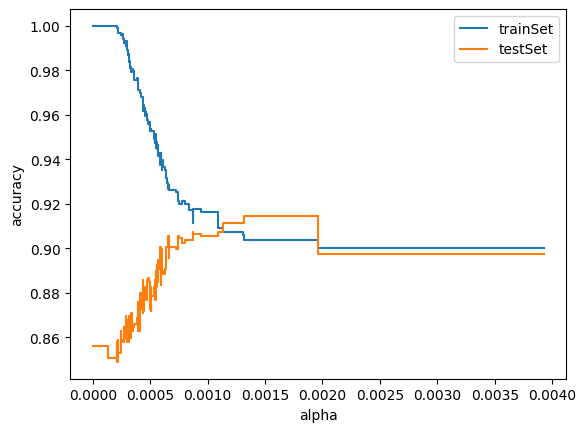

Optimum value of Alpha is:  0.001090638457924108

Accuracy After Pruning:  90.75546719681908%

Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.43      0.56       136
        True       0.92      0.98      0.95       870

    accuracy                           0.91      1006
   macro avg       0.85      0.71      0.75      1006
weighted avg       0.90      0.91      0.90      1006


Tree Diagram:


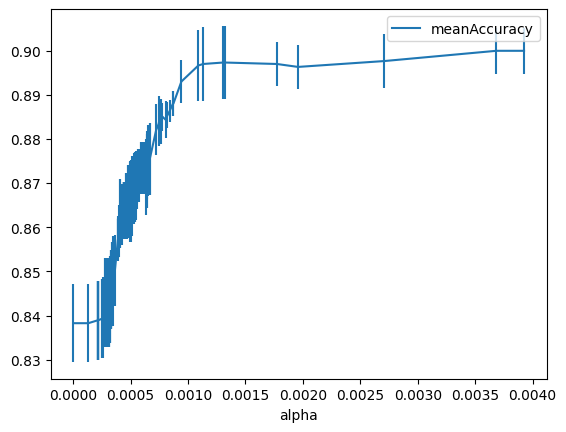

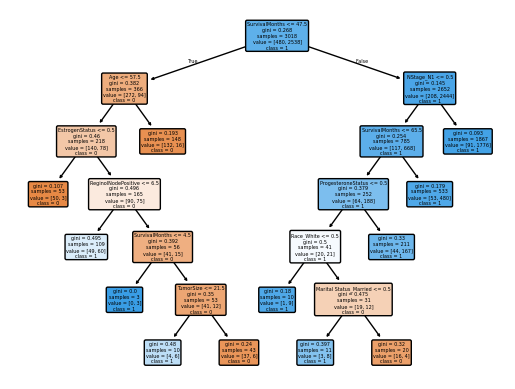


Confusion Matrix:


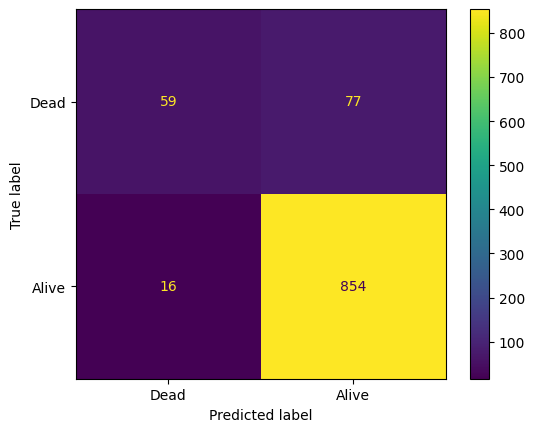

In [74]:
deployTree(trainingX, trainingY, testingX, testingY, 'gini')

## Entropy Based Tree:

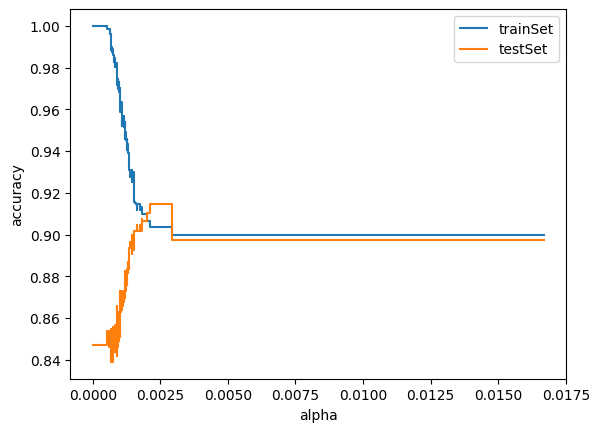

Optimum value of Alpha is:  0.002016160312726607

Accuracy After Pruning:  91.05367793240556%

Classification Report:
               precision    recall  f1-score   support

       False       0.80      0.45      0.58       136
        True       0.92      0.98      0.95       870

    accuracy                           0.91      1006
   macro avg       0.86      0.72      0.76      1006
weighted avg       0.90      0.91      0.90      1006


Tree Diagram:


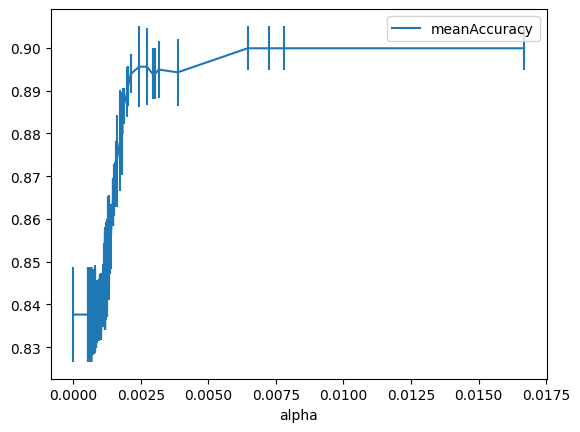

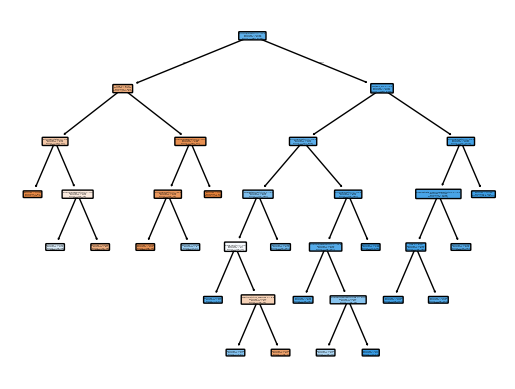


Confusion Matrix:


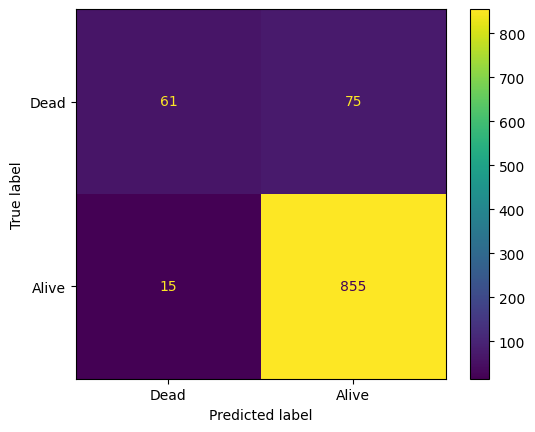

In [75]:
deployTree(trainingX, trainingY, testingX, testingY, 'entropy')

# Random Forest

Accuracy 91.45129224652088%

Classification Report:
               precision    recall  f1-score   support

       False       0.78      0.51      0.62       136
        True       0.93      0.98      0.95       870

    accuracy                           0.91      1006
   macro avg       0.85      0.75      0.79      1006
weighted avg       0.91      0.91      0.91      1006


Confusion Matrix:


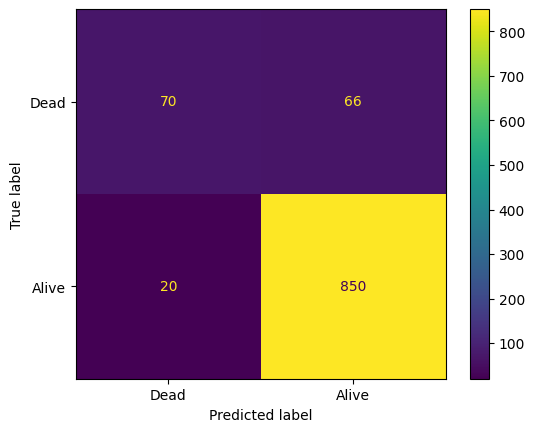

In [107]:
randomForest = RandomForestClassifier(n_jobs=-1, n_estimators=90, max_depth=30, max_features=16, bootstrap=True, max_samples=0.6) 
# HyperParameters have been decided by brute force
# Since the parameters are all important, we cannot specify min_samples_split or leaf
# For this dataset, min_impurity decrease tends to make the model overfit the test set

randomForest = randomForest.fit(trainingX, trainingY)

# Getting predictions and metrics
predictions = randomForest.predict(testingX)
print("Accuracy", str(randomForest.score(testingX, testingY)*100)+"%")
print()
print("Classification Report:\n", classification_report(testingY, predictions))
print()
print("Confusion Matrix:")
confusionMatrix = confusion_matrix(testingY, predictions, labels=randomForest.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = confusionMatrix, display_labels=['Dead', "Alive"])
display.plot()
plt.show()